# EB Magics

## New renderer

In [1]:
import io.github.spencerpark.ijava.IJava;

IJava.getKernelInstance().getRenderer()
    .createRegistration(tech.tablesaw.plotly.components.Figure.class)
    .preferring(io.github.spencerpark.jupyter.kernel.display.mime.MIMEType.TEXT_HTML)
    .register((figure, ctx) -> {
      /*  ctx.renderIfRequested(io.github.spencerpark.jupyter.kernel.display.mime.MIMEType.TEXT_HTML, () -> {
            String id = UUID.randomUUID().toString().replace("-", "");

            figure.asJavascript(id);
            Map<String, Object> context = figure.getContext();

            StringBuilder html = new StringBuilder();
            html.append("<div id=\"").append(id).append("\"></div>\n");
            html.append("<script>require(['https://cdn.plot.ly/plotly-1.44.4.min.js'], Plotly => {\n");
            html.append("var target_").append(id).append(" = document.getElementById('").append(id).append("');\n");
            html.append(context.get("figure")).append('\n');
            html.append(context.get("plotFunction")).append('\n');
            html.append("})</script>\n");
            return html.toString();
        });*/
      ctx.renderIfRequested(io.github.spencerpark.jupyter.kernel.display.mime.MIMEType.TEXT_HTML, () -> {            
          String id = UUID.randomUUID().toString().replace("-", "");
           figure.asJavascript(id);
            return "AIE ("+id+") ["+ figure.asJavascript("TEST")+"]";
        });
    
    
    
    
    })
    
    
    
    ;

CompilationException: 

In [2]:
import tech.tablesaw.api.*;
import tech.tablesaw.plotly.api.*;
import tech.tablesaw.plotly.components.*;

String[] animals = {"bear", "cat", "giraffe"};
double[] cuteness = {90.1, 84.3, 99.7};

Table cuteAnimals = Table.create("Cute Animals")
    .addColumns(
        StringColumn.create("Animal types", animals),
        DoubleColumn.create("rating", cuteness)
    );
cuteAnimals.structure()

CompilationException: 

In [3]:
VerticalBarPlot.create("Cute animals", cuteAnimals, "Animal types", "rating");

CompilationException: 

In [4]:
render(VerticalBarPlot.create("Cute animals", cuteAnimals, "Animal types", "rating"), "text/html");

CompilationException: 

In [5]:
Figure figure = VerticalBarPlot.create("Cute animals", cuteAnimals, "Animal types", "rating");
display(figure);

cuteAnimals

CompilationException: 

In [6]:

import net.sourceforge.plantuml.*;
import net.sourceforge.plantuml.core.DiagramDescription;

import java.io.ByteArrayOutputStream;
import java.io.IOException;
import java.nio.charset.Charset;

CompilationException: 

In [7]:
%%loadFromPOM
<dependency>
    <groupId>tech.tablesaw</groupId>
    <artifactId>tablesaw-jsplot</artifactId>
    <version>0.38.0</version>
</dependency>
<dependency> 
  <groupId>org.slf4j</groupId>
  <artifactId>slf4j-jdk14</artifactId>
  <version>1.7.28</version>
</dependency>

## plantUML Magics

In [6]:
%jars /usr/local/bin/plantuml.jar

import io.github.spencerpark.ijava.IJava;
import net.sourceforge.plantuml.*;
import net.sourceforge.plantuml.core.DiagramDescription;
import java.nio.charset.Charset;
import javax.imageio.ImageIO;
import java.nio.file.Files;
import java.nio.file.Path;
import java.nio.file.Paths;



/**
Render plantUML from cell
*/
IJava.getKernelInstance().getMagics().registerCellMagic("plantUML", (args, body) -> {
        //sets the results mimetype
        if (args.size()>1) throw new Exception("Max one argument : SVG or PNG");
        String fileFormat;
        if (args.size()==0) fileFormat="SVG"; 
          else fileFormat=args.get(0);    
        
        SourceStringReader reader = new SourceStringReader(body);
        final ByteArrayOutputStream os = new ByteArrayOutputStream();

        DiagramDescription desc = reader.outputImage(os, new FileFormatOption(FileFormat.valueOf(fileFormat)));
        os.close();
        Object out;
        if (fileFormat.equals("SVG"))
            out = new String(os.toByteArray(), Charset.forName("UTF-8"));
        else 
            out= ImageIO.read(new ByteArrayInputStream(os.toByteArray()));
        
        display(out,fileFormat.equals("SVG")?"image/svg+xml":"image/png");
        return out;
        });

/**
Render plantUML from file
*/
IJava.getKernelInstance().getMagics().registerCellMagic("plantUMLFile", (args, body) -> {    
    //sets the results mimetype
    if (args.size()>1) throw new Exception("Max one argument : SVG or PNG");
    String fileFormat;
    if (args.size()==0) fileFormat="SVG"; 
    else fileFormat=args.get(0);
    
    List<String> l = new ArrayList<>();

    List<Object> outList = new ArrayList<>();
    body.lines().forEach(filename-> {
     Object out;        
     try {        
        out=cellMagic("plantUML",args,Files.readString(Paths.get(filename)));
        //display(out,fileFormat.equals("SVG")?"image/svg+xml":"image/png");
        outList.add(out);
     } catch (java.io.IOException e) {}
    });    
    
        return outList;
                
        });
    

# UML
Ceci est une explication. vsdfgndfo

  * liste1
  * liste1

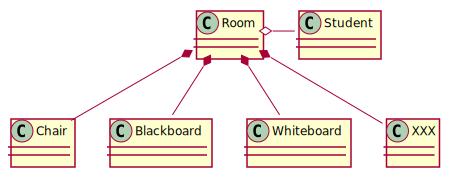

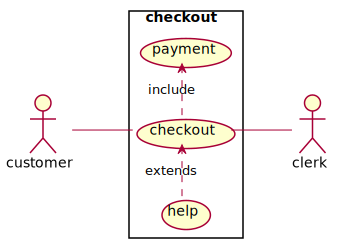

In [8]:
%%plantUMLFile
classDiagram.uml
usecaseDiagram.uml

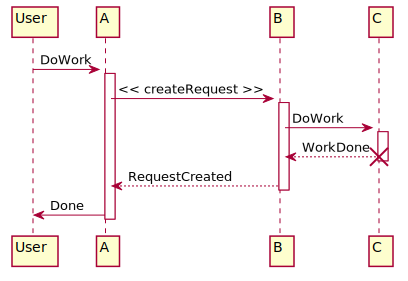

In [37]:
%%plantUML
@startuml
participant User

User -> A: DoWork
activate A

A -> B: << createRequest >>
activate B

B -> C: DoWork
activate C
C --> B: WorkDone
destroy C

B --> A: RequestCreated
deactivate B


A -> User: Done
deactivate A

@enduml

## Shell

In [4]:
import java.io.File;
import java.io.InputStream;
import java.util.function.Consumer;
import java.util.concurrent.Future;

private static class StreamGobbler implements Runnable {
    private InputStream inputStream;
    private Consumer<String> consumer;

    public StreamGobbler(InputStream inputStream, Consumer<String> consumer) {
        this.inputStream = inputStream;
        this.consumer = consumer;
    }

    @Override
    public void run() {
        new BufferedReader(new InputStreamReader(inputStream)).lines()
          .forEach(consumer);
    }
}

IJava.getKernelInstance().getMagics().registerCellMagic("shell", (args, body) -> {
    String[] commands = {"zsh", "-c", body};
    Process process = new ProcessBuilder()
        //.redirectErrorStream(true)
        .command(commands).start();

    StreamGobbler streamGobbler =
      new StreamGobbler(process.getInputStream(), System.out::println);
    StreamGobbler streamGobblerErr =
      new StreamGobbler(process.getErrorStream(), System.err::println);
    Executors.newSingleThreadExecutor().submit(streamGobbler);
    Executors.newSingleThreadExecutor().submit(streamGobblerErr);
    
    return process.waitFor();
})

In [5]:
%%shell
mvn -ntp

[INFO] Scanning for projects...
[INFO] ------------------------------------------------------------------------
[INFO] BUILD FAILURE
[INFO] ------------------------------------------------------------------------
[INFO] Total time:  0.074 s
[INFO] Finished at: 2020-07-01T10:26:50Z
[INFO] ------------------------------------------------------------------------
[ERROR] No goals have been specified for this build. You must specify a valid lifecycle phase or a goal in the format <plugin-prefix>:<goal> or <plugin-group-id>:<plugin-artifact-id>[:<plugin-version>]:<goal>. Available lifecycle phases are: validate, initialize, generate-sources, process-sources, generate-resources, process-resources, compile, process-classes, generate-test-sources, process-test-sources, generate-test-resources, process-test-resources, test-compile, process-test-classes, test, prepare-package, package, pre-integration-test, integration-test, post-integration-test, verify, install, deploy, pre-clean, clean, post-c

In [7]:
%%shell
echo $MAVEN_HOME
echo $JAVA_HOME

/usr/share/maven
/opt/java/openjdk


In [8]:
%%loadFromPOM
<dependency>
  <groupId>org.jooq</groupId>
  <artifactId>joor</artifactId>
  <version>0.9.12</version>
</dependency>

<dependency>
    <groupId>org.projectlombok</groupId>
    <artifactId>lombok</artifactId>
    <version>1.18.12</version>
</dependency>

<dependency>
    <groupId>org.reflections</groupId>
    <artifactId>reflections</artifactId>
    <version>0.9.11</version>
</dependency>


In [9]:
import org.joor.Reflect;
import java.util.function.Supplier;
import org.reflections.*;

String className="com.example.CompileTest";
String content="""
//    package REPL;
    package com.example;
    import lombok.*;
    
    @Data
    //@Builder
    public class CompileTest
    implements java.util.function.Supplier<String> {
      private static int lastId=0;
      private int id=++lastId;
      public String get() {
        return "Hello World!";
      }
    }""";

                
Object o = Reflect.compile(className,content);
System.out.println(o);
//java.util.Enumeration x=o.getClassLoader() .getResources("com/example/o.getSimpleName()"+".class");
/*while (x.hasMoreElements()) 
    System.out.println("["+x.nextElement()+"]");*/
"("+o+")"

class com.example.CompileTest


(class com.example.CompileTest)

In [10]:
o.getClassLoader().loadClass("com.example.CompileTest");

CompilationException: 

In [11]:
o.newInstance();

CompilationException: 

In [12]:
com.example.CompileTest t;

CompilationException: 

In [13]:
x.getClass().getClassLoader();

CompilationException: 

In [14]:
import java.io.ByteArrayOutputStream;
import java.io.File;
import java.io.FilterOutputStream;
import java.io.IOException;
import java.io.OutputStream;
import java.net.URI;
import java.nio.CharBuffer;
import java.util.HashMap;
import java.util.Map;

import javax.tools.FileObject;
import javax.tools.ForwardingJavaFileManager;
import javax.tools.JavaFileManager;
import javax.tools.JavaFileObject;
import javax.tools.JavaFileObject.Kind;
import javax.tools.SimpleJavaFileObject;

/**
 * JavaFileManager that keeps compiled .class bytes in memory.
 */
@SuppressWarnings("unchecked")
final class MemoryJavaFileManager extends ForwardingJavaFileManager {

    /** Java source file extension. */
    private final static String EXT = ".java";

    private Map<String, byte[]> classBytes;

    public MemoryJavaFileManager(JavaFileManager fileManager) {
        super(fileManager);
        classBytes = new HashMap<>();
    }

    public Map<String, byte[]> getClassBytes() {
        return classBytes;
    }

    public void close() throws IOException {
        classBytes = null;
    }

    public void flush() throws IOException {
    }

    /**
     * A file object used to represent Java source coming from a string.
     */
    private static class StringInputBuffer extends SimpleJavaFileObject {
        final String code;

        StringInputBuffer(String fileName, String code) {
            super(toURI(fileName), Kind.SOURCE);
            this.code = code;
        }

        public CharBuffer getCharContent(boolean ignoreEncodingErrors) {
            return CharBuffer.wrap(code);
        }
    }

    /**
     * A file object that stores Java bytecode into the classBytes map.
     */
    private class ClassOutputBuffer extends SimpleJavaFileObject {
        private String name;

        ClassOutputBuffer(String name) {
            super(toURI(name), Kind.CLASS);
            this.name = name;
        }

        public OutputStream openOutputStream() {
            return new FilterOutputStream(new ByteArrayOutputStream()) {
                public void close() throws IOException {
                    out.close();
                    ByteArrayOutputStream bos = (ByteArrayOutputStream)out;
                    classBytes.put(name, bos.toByteArray());
                }
            };
        }
    }

    public JavaFileObject getJavaFileForOutput(JavaFileManager.Location location,
        String className,
        Kind kind,
        FileObject sibling) throws IOException {
        if (kind == Kind.CLASS) {
            return new ClassOutputBuffer(className);
        } else {
            return super.getJavaFileForOutput(location, className, kind, sibling);
        }
    }

    static JavaFileObject makeStringSource(String fileName, String code) {
        return new StringInputBuffer(fileName, code);
    }

    static URI toURI(String name) {
        File file = new File(name);
        if (file.exists()) {
            return file.toURI();
        } else {
            try {
                final StringBuilder newUri = new StringBuilder();
                newUri.append("mfm:///");
                newUri.append(name.replace('.', '/'));
                if(name.endsWith(EXT)) newUri.replace(newUri.length() - EXT.length(), newUri.length(), EXT);
                return URI.create(newUri.toString());
            } catch (Exception exp) {
                return URI.create("mfm:///com/sun/script/java/java_source");
            }
        }
    }
}

In [15]:
import java.io.File;
import java.net.MalformedURLException;
import java.net.URL;
import java.net.URLClassLoader;
import java.util.ArrayList;
import java.util.List;
import java.util.Map;
import java.util.StringTokenizer;

/**
 * ClassLoader that loads .class bytes from memory.
 */
final class MemoryClassLoader extends URLClassLoader {
    private Map<String, byte[]> classBytes;

    public MemoryClassLoader(Map<String, byte[]> classBytes,
        String classPath, ClassLoader parent) {
        super(toURLs(classPath), parent);
        this.classBytes = classBytes;
    }

    public MemoryClassLoader(Map<String, byte[]> classBytes, String classPath) {
        this(classBytes, classPath, ClassLoader.getSystemClassLoader());
    }

    public MemoryClassLoader(Map<String, byte[]> classBytes) {
        this(classBytes, null, ClassLoader.getSystemClassLoader());
    }

    public Class load(String className) throws ClassNotFoundException {
        return loadClass(className);
    }

    public Iterable<Class> loadAll() throws ClassNotFoundException {
        List<Class> classes = new ArrayList<Class>(classBytes.size());
        for (String name : classBytes.keySet()) {
            classes.add(loadClass(name));
        }
        return classes;
    }

    protected Class findClass(String className) throws ClassNotFoundException {
        byte[] buf = classBytes.get(className);
        if (buf != null) {
            // clear the bytes in map -- we don't need it anymore
            classBytes.put(className, null);
            return defineClass(className, buf, 0, buf.length);
        } else {
            return super.findClass(className);
        }
    }

    private static URL[] toURLs(String classPath) {
        if (classPath == null) {
            return new URL[0];
        }

        List<URL> list = new ArrayList<URL>();
        StringTokenizer st = new StringTokenizer(classPath, File.pathSeparator);
        while (st.hasMoreTokens()) {
            String token = st.nextToken();
            File file = new File(token);
            if (file.exists()) {
                try {
                    list.add(file.toURI().toURL());
                } catch (MalformedURLException mue) {}
            } else {
                try {
                    list.add(new URL(token));
                } catch (MalformedURLException mue) {}
            }
        }
        URL[] res = new URL[list.size()];
        list.toArray(res);
        return res;
    }
}

In [16]:
import java.io.IOException;
import java.io.PrintWriter;
import java.io.Writer;
import java.lang.reflect.Method;
import java.util.ArrayList;
import java.util.List;
import java.util.Map;

import javax.tools.*;

/**
 * Simple interface to Java compiler using JSR 199 Compiler API.
 */
public class MemoryJavaCompiler {
    private javax.tools.JavaCompiler tool;
    private StandardJavaFileManager stdManager;

    public MemoryJavaCompiler() {
        tool = ToolProvider.getSystemJavaCompiler();
        if (tool == null) {
            throw new RuntimeException("Could not get Java compiler. Please, ensure that JDK is used instead of JRE.");
        }
        stdManager = tool.getStandardFileManager(null, null, null);
    }

    /**
     * Compile a single static method.
     */
    public Method compileStaticMethod(final String methodName, final String className,
        final String source)
        throws ClassNotFoundException {
        final Map<String, byte[]> classBytes = compile(className + ".java", source);
        final MemoryClassLoader classLoader = new MemoryClassLoader(classBytes);
        final Class clazz = classLoader.loadClass(className);
        final Method[] methods = clazz.getDeclaredMethods();
        for (final Method method : methods) {
            if (method.getName().equals(methodName)) {
                if (!method.isAccessible()) method.setAccessible(true);
                return method;
            }
        }
        throw new NoSuchMethodError(methodName);
    }


    public Map<String, byte[]> compile(String fileName, String source) {
        return compile(fileName, source, new PrintWriter(System.err), null, null);
    }


    /**
     * compile given String source and return bytecodes as a Map.
     *
     * @param fileName source fileName to be used for error messages etc.
     * @param source Java source as String
     * @param err error writer where diagnostic messages are written
     * @param sourcePath location of additional .java source files
     * @param classPath location of additional .class files
     */
    private Map<String, byte[]> compile(String fileName, String source,
        Writer err, String sourcePath, String classPath) {
        // to collect errors, warnings etc.
        DiagnosticCollector<JavaFileObject> diagnostics =
            new DiagnosticCollector<JavaFileObject>();

        // create a new memory JavaFileManager
        MemoryJavaFileManager fileManager = new MemoryJavaFileManager(stdManager);

        // prepare the compilation unit
        List<JavaFileObject> compUnits = new ArrayList<JavaFileObject>(1);
        compUnits.add(fileManager.makeStringSource(fileName, source));

        return compile(compUnits, fileManager, err, sourcePath, classPath);
    }

    private Map<String, byte[]> compile(final List<JavaFileObject> compUnits, 
        final MemoryJavaFileManager fileManager,
        Writer err, String sourcePath, String classPath) {
        // to collect errors, warnings etc.
        DiagnosticCollector<JavaFileObject> diagnostics =
            new DiagnosticCollector<JavaFileObject>();

        // javac options
        List<String> options = new ArrayList<String>();
        options.add("-Xlint:all");
        //      options.add("-g:none");
        options.add("-deprecation");
        if (sourcePath != null) {
            options.add("-sourcepath");
            options.add(sourcePath);
        }

        if (classPath != null) {
            options.add("-classpath");
            options.add(classPath);
        }

        // create a compilation task
        javax.tools.JavaCompiler.CompilationTask task =
            tool.getTask(err, fileManager, diagnostics,
                options, null, compUnits);

        if (task.call() == false) {
            PrintWriter perr = new PrintWriter(err);
            for (Diagnostic diagnostic : diagnostics.getDiagnostics()) {
                perr.println(diagnostic);
            }
            perr.flush();
            return null;
        }

        Map<String, byte[]> classBytes = fileManager.getClassBytes();
        try {
            fileManager.close();
        } catch (IOException exp) {
        }

        return classBytes;
    }
}

In [17]:
MemoryJavaCompiler compiler = new MemoryJavaCompiler();

In [18]:
String fileName="CompileTest.java";
String content="""
    //package com.example;
    package REPL;
    //import lombok.*;
    
    //@Data
    //@Builder
    public class CompileTest
    implements java.util.function.Supplier<String> {
      private static int lastId=0;
      private int id=++lastId;
      public String get() {
        return "Hello World!";
      }
    }""";


In [19]:
Map<String,byte[]>classes=compiler.compile(fileName,content);
classes;

{REPL.CompileTest=[B@5d904623}

In [20]:
classes.get("com.example.CompileTest").getClass();

EvalException: null

In [21]:
compiler.getClass().getClassLoader().defineClass(className,classes.get("CompileTest"),0,classes.get("CompileTest").length);

CompilationException: 

In [22]:
import static java.lang.StackWalker.Option.RETAIN_CLASS_REFERENCE;

private ClassLoader createClassLoader(Map<String,byte[]> classes) {
        return new ClassLoader() {
            @Override
            public Class<?> findClass(String name) throws ClassNotFoundException {
                return defineClass(name, classes.get(name), 0, classes.get(name).length);
            }
        };
    }

class MyClassLoader extends ClassLoader {
     public Class findClass(String name) {
             return defineClass(name, classes.get(name), 0, classes.get(name).length);
         }

}

In [23]:
createClassLoader(classes).findClass("com.example.CompileTest");

CompilationException: 

In [24]:
Object c=new MyClassLoader().findClass("com.example.CompileTest").newInstance();

EvalException: null

In [25]:
com.example.CompileTest C;

CompilationException: 

In [26]:
import static java.lang.StackWalker.Option.RETAIN_CLASS_REFERENCE;
import java.lang.invoke.MethodHandles;
import java.lang.invoke.MethodHandles.Lookup;


Lookup lookup = MethodHandles.lookup();

Class<?> result = null;


Class<?> caller = StackWalker
                        .getInstance(RETAIN_CLASS_REFERENCE)
                        .walk(s -> s
                            .skip(2)
                            .findFirst()
                            .get()
                            .getDeclaringClass());

if (className.startsWith(caller.getPackageName() + ".") &&

                        // [#74] This heuristic is necessary to prevent classes in subpackages of the caller to be loaded
                        //       this way, as subpackages cannot access private content in super packages.
                        //       The heuristic will work only with classes that follow standard naming conventions.
                        //       A better implementation is difficult at this point.
                        Character.isUpperCase(className.charAt(caller.getPackageName().length() + 1))) {
                        Lookup privateLookup = MethodHandles.privateLookupIn(caller, lookup);
                        result = fileManager.loadAndReturnMainClass(className,
                            (name, bytes) -> privateLookup.defineClass(bytes));
                    }

CompilationException: 

In [27]:
class Titi {}

In [28]:
Titi titi = new Titi();

In [29]:
titi.getClass().getPackage();

package REPL

In [30]:
titi.getClass();

class REPL.$JShell$106$Titi